### KDT
#### 1. Python 데이터분석: 예측모델 개발

- 강사: 최가람, 천재교육 AI센터 데이터기획분석팀원
- 주요 업무: 이탈 예측, 추천 (도서, 콘텐츠) 모델 개발 및 운영, 데이터 분석 업무

- 일정: 2023.8.07 ~ 8.08
<p>

- 교육내용
    - <b>이탈 예측 모델 개념 및 활용 데이터 설명</b>
    - <b>데이터 전처리 모듈 개발</b>
    - <b>분석 모델링 개발 실습 1 (Logistic Regression, LGBM)</b>
    - <b>분석 모델링 개발 실습 2 (Logistic Regression, LGBM)</b>
    - <b>성능 지표 개념 (Confusion Matrix)</b>
    - 모델 성능 결과 분석
    - 모델 최적화
<p>

- 교육목표
    - 온라인 교육 서비스를 이용하고 있는 유저들의 이력을 바탕으로 이탈 여부를 예측할 수 있는 모델을 개발해보자
    - 통합학년 이탈 예측 모델 구성
    - 학년 별 이탈 예측 모델 구성
    - 구매/재구매 별 이탈 예측 모델 구성
    - 과제) 이탈 예측 모델 개발: 활용 데이터 간략 설명, 예측 모델(logistic, DCT, Xgboost, LGBM 등등) 구성, ** 성능 지표를 통한 결과 설명 **

#### 2. 이탈예측 데이터 분석

In [ ]:
# 데이터 읽어 오기
# 파일명: churn_data.csv

In [19]:
import pandas as pd
import numpy as np

In [20]:
churn = pd.read_csv('churn_data.csv', index_col = 0).reset_index()

In [3]:
# 데이터 기본 확인 (전체 레코드 수, 컬럼명 등)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number                    60000 non-null  int64  
 1   system_id                 60000 non-null  object 
 2   grade_sect_cd             60000 non-null  object 
 3   mbr_sex_cd                60000 non-null  object 
 4   tmon_pchrg_lrn_dcnt       60000 non-null  float64
 5   acmlt_pchrg_lrn_dcnt      60000 non-null  float64
 6   acmlt_bilclct_amt         60000 non-null  float64
 7   correct_rate_avg          60000 non-null  float64
 8   learning_time_avg         60000 non-null  float64
 9   media_action_cnt_sum      60000 non-null  float64
 10  non_video_viewed_cnt_sum  60000 non-null  float64
 11  get_mm_point_sum          60000 non-null  float64
 12  label                     60000 non-null  int64  
 13  re_purch                  60000 non-null  bool   
dtypes: boo

In [4]:
churn.head()

,number,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,3,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,7,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,8,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,21,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,25,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False


In [5]:
churn.columns

Index(['number', 'system_id', 'grade_sect_cd', 'mbr_sex_cd',
       'tmon_pchrg_lrn_dcnt', 'acmlt_pchrg_lrn_dcnt', 'acmlt_bilclct_amt',
       'correct_rate_avg', 'learning_time_avg', 'media_action_cnt_sum',
       'non_video_viewed_cnt_sum', 'get_mm_point_sum', 'label', 're_purch'],
      dtype='object')

In [6]:
# 전체 길이 살펴보기 -> 60000개의 user에 대한 데이터라는 걸 확인
# rows -> 1rows -> user1명
len(churn)

60000

In [7]:
# 결측치
churn = churn.fillna(0)

In [8]:
# 필요 없는 컬럼 제거 -> number
churn = churn.drop(columns=['number'])

In [9]:
churn.columns

Index(['system_id', 'grade_sect_cd', 'mbr_sex_cd', 'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt', 'acmlt_bilclct_amt', 'correct_rate_avg',
       'learning_time_avg', 'media_action_cnt_sum', 'non_video_viewed_cnt_sum',
       'get_mm_point_sum', 'label', 're_purch'],
      dtype='object')

컬럼 설명

- system_id	: system 상 id
- grade_sect_cd	: 학년 (1~6학년)
- mbr_sex_cd : 성별
- tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
- acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
- acmlt_bilclct_amt	: 누적 수금액
- correct_rate_avg	: 당월 획득 점수 평균
- learning_time_avg	: 당월 학습 시간 평균
- media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합) # 캘리퍼 데이터
- non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합) # 캘리퍼 데이터
- get_mm_point_sum : 당월 획득 포인트 합 (사용 x)
- label	: 이탈, 미이탈 여부 (0 - 미이탈, 1 - 이탈)
- re_purch : 신규, 재구매 여부 (False - 신규, True - 재구매)

In [10]:
# 컬럼 별 값 확인 (범주형)
# 학년, 성별, label, re_purch
churn[['grade_sect_cd','mbr_sex_cd','label','re_purch']]

,grade_sect_cd,mbr_sex_cd,label,re_purch
0,G011,M,0,False
1,G011,M,0,False
2,G011,F,0,False
3,G011,M,0,False
4,G011,M,0,False
...,...,...,...,...
59995,G016,F,0,True
59996,G016,M,0,True
59997,G016,F,0,False
59998,G016,M,0,True


In [11]:
churn.nunique()

system_id                   59969
grade_sect_cd                   6
mbr_sex_cd                      3
tmon_pchrg_lrn_dcnt            32
acmlt_pchrg_lrn_dcnt          731
acmlt_bilclct_amt            1570
correct_rate_avg               93
learning_time_avg           38023
media_action_cnt_sum         3036
non_video_viewed_cnt_sum     1071
get_mm_point_sum             8669
label                           2
re_purch                        2
dtype: int64

In [12]:
churn['grade_sect_cd'].unique()

array(['G011', 'G012', 'G013', 'G014', 'G015', 'G016'], dtype=object)

In [13]:
churn['mbr_sex_cd'].unique()

array(['M', 'F', 'X'], dtype=object)

In [14]:
churn['label'].unique()

array([0, 1], dtype=int64)

In [15]:
churn['re_purch'].unique()

array([False,  True])

In [16]:
# 컬럼 별 값 확인 (수치형)
churn[['tmon_pchrg_lrn_dcnt','acmlt_pchrg_lrn_dcnt','acmlt_bilclct_amt','correct_rate_avg','learning_time_avg','media_action_cnt_sum','non_video_viewed_cnt_sum','get_mm_point_sum']]

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum
0,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0
1,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0
2,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0
3,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0
4,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
59995,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0
59996,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0
59997,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0
59998,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0


In [17]:
churn.describe()

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label
count,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,27.335317,355.340267,1.251115e+06,0.717041,410.660642,620.859917,237.936550,2830.626967,0.015533
std,8.584667,225.370258,7.912310e+05,0.203345,373.773580,737.375004,153.297371,2435.607888,0.123662
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,169.000000,5.950000e+05,0.650000,236.735000,326.000000,157.000000,1017.000000,0.000000
50%,31.000000,344.000000,1.199000e+06,0.760000,340.335000,501.000000,229.000000,2145.000000,0.000000
75%,31.000000,532.000000,1.817000e+06,0.850000,492.200000,744.000000,301.000000,4472.000000,0.000000
max,31.000000,730.000000,2.616000e+06,1.000000,42755.000000,45609.000000,6509.000000,66552.000000,1.000000


In [18]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [14, 10]

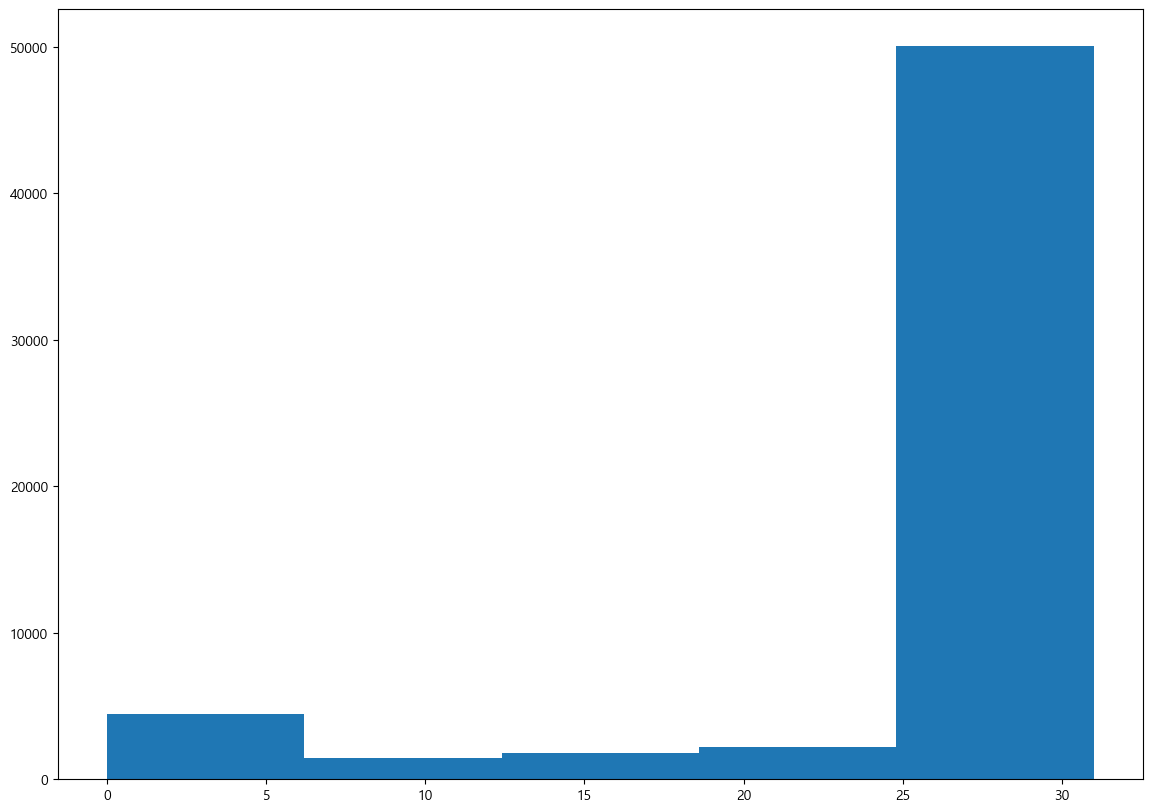

In [19]:
# 당월 유료학습일 수 :
plt.hist(churn['tmon_pchrg_lrn_dcnt'], bins=5)
plt.show()

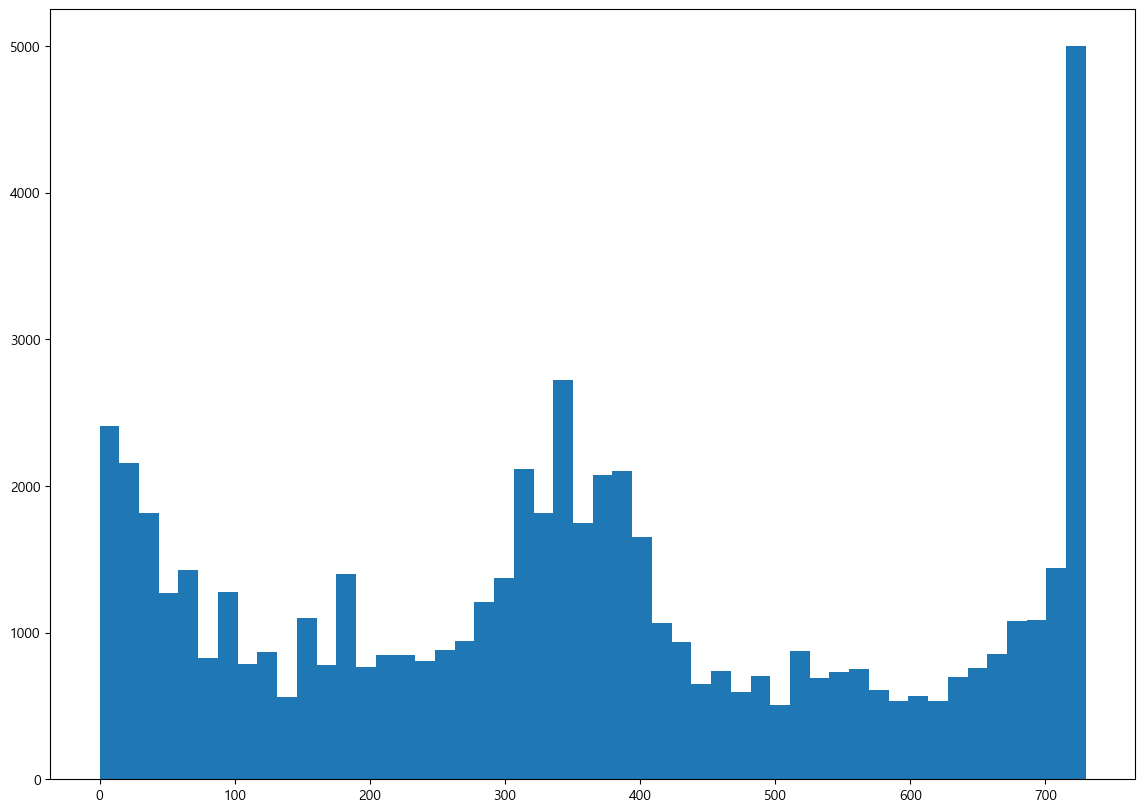

In [20]:
# 누적 유료학습일 수 :
plt.hist(churn['acmlt_pchrg_lrn_dcnt'], bins=50)
plt.show()

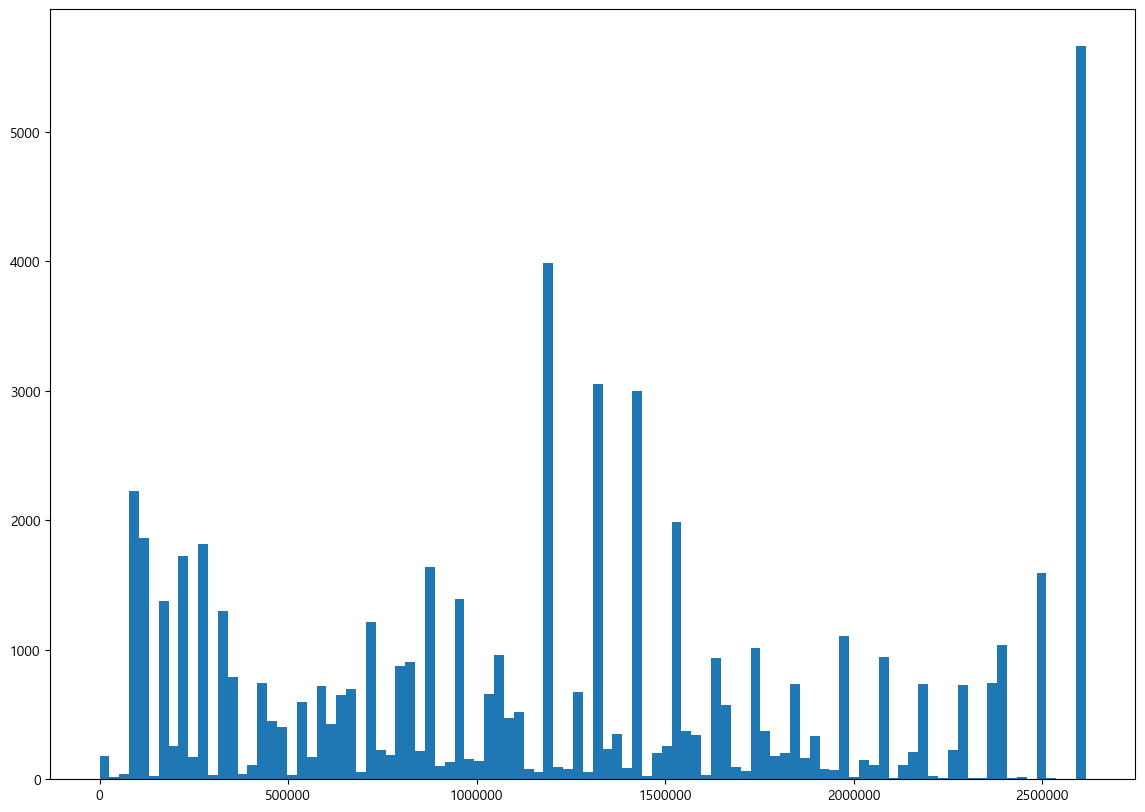

In [21]:
# 누적 수금액:
acm_bil = churn['acmlt_bilclct_amt'].apply(lambda x: int(float(x)))
plt.hist(acm_bil, bins=100)
plt.ticklabel_format(axis='x', style='plain', useOffset=False)
plt.show()

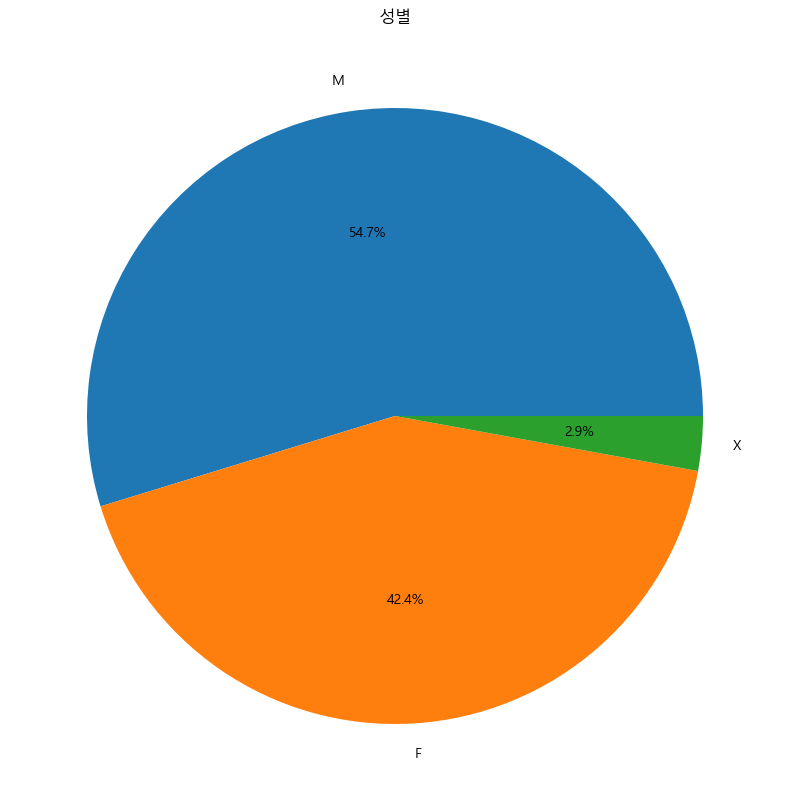

In [22]:
grade = churn['mbr_sex_cd'].value_counts()

plt.pie(grade, labels = grade.index, autopct = '%2.1f%%')
plt.title('성별')
plt.show()

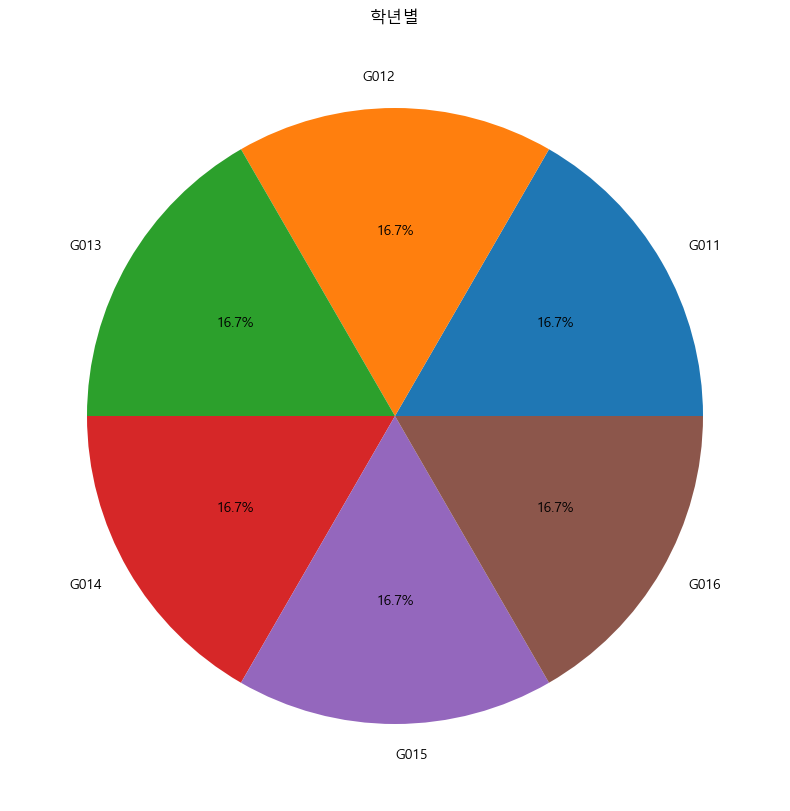

In [23]:
grade = churn['grade_sect_cd'].value_counts()

plt.pie(grade, labels = grade.index, autopct = '%2.1f%%')
plt.title('학년별')
plt.show()

#### 3. 이탈예측 모델

[데이터 - 컨셉]
- 결과 : 이탈 or 미이탈
- 학년 이력 : 전체 학년 통합 or 학년 별 분리
- 구매, 재구매 이력: Feature 사용 or 모델 분리
- 성별 이력 등등..

[모델]
- 데이터 처리 : DB 사용 -> SQL 처리
- 모델 구현 (Logistic Regression, LGBM)
- 실행부
- 최적화 (Optimizing)

##### 3-1 데이터 전처리

In [24]:
# 데이터 읽어오기
import copy
churn_df = copy.deepcopy(churn)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# 학습 데이터, 레이블 (label) 분리
X = churn_df.drop(columns={'label'})
y = churn_df['label']

In [35]:
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
X['grade_sect_cd'].value_counts()

G011    10000
G012    10000
G013    10000
G014    10000
G015    10000
G016    10000
Name: grade_sect_cd, dtype: int64

In [29]:
def change_value(values):
    if values == 'G011':
        return 1
    elif values == 'G012':
        return 2
    elif values == 'G013':
        return 3
    elif values == 'G014':
        return 4
    elif values == 'G015':
        return 5
    elif values == 'G016':
        return 6

In [30]:
X['grade'] = X['grade_sect_cd'].apply(change_value)

In [31]:
X['grade'].value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
6    10000
Name: grade, dtype: int64

In [25]:
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성 (강사님 버전)
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_df['grade'] = churn_re['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_df.head()

NameError: name 'churn_re' is not defined

In [52]:
# 필요 컬럼만 가져오기 (X : 학습 데이터, y: 레이블)
# - grade_sect_cd	: 학년 (1~6학년)
# - mbr_sex_cd : 성별
# - tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수
# - acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도)
# - acmlt_bilclct_amt	: 누적 수금액
# - correct_rate_avg	: 당월 획득 점수 평균
# - learning_time_avg	: 당월 학습 시간 평균
# - media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합) # 캘리퍼 데이터
# - non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합) # 캘리퍼 데이터
# - get_mm_point_sum : 당월 획득 포인트 합 (사용 x)

In [41]:
X = churn_df[['grade',
             'tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             'get_mm_point_sum']]

y = churn_df['label']

In [49]:
# Train, Test 데이터 분리 (이탈 미이탈 값 확인)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.3 이렇게가 국룰인데 데이터 양이 적어서 0.2 비율로 설정

print("[Train] 전체 : {}, 이탈: {}, 미이탈: {}".format(len(X_train), y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
print("[Test] 전체 : {}, 이탈: {}, 미이탈: {}".format(len(X_test), y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

[Train] 전체 : 48000, 이탈: 746, 미이탈: 47254
[Test] 전체 : 12000, 이탈: 186, 미이탈: 11814


##### 3-2 Logistic regression 모델 : 선형을 따르는 데이터일 경우에 결과가 더 좋게 나옴

In [53]:
from sklearn.linear_model import LogisticRegression
# Logistic 모델 학습
log_model = LogisticRegression(random_state=0) # 같은 데이터 넣었을때 동일한 값이 나오도록하는 것
log_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [55]:
# 예측 및 결과
y_pred = log_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈 {}".format(y_pred.count(1), y_pred.count(0)))
# y_test: 결과 값(실제 값)

[Predict] 이탈: 22, 미이탈 11978


In [56]:
# 예측 데이터와 실제 데이터의 차이 살펴보기 (True or False)
# [Test] 이탈: 186, 미이탈: 11814
# [Predict] 이탈: 22, 미이탈 11978

In [57]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 미이탈이 너무 많아서 다 0으로 해도 정확도 높음

0.9828333333333333

In [58]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.045454545454545456, 0.005376344086021506, 0.009615384615384614, None)

##### 3-3 LGBM 모델 (현업에서 가장 많이 쓰이는 모델)

In [59]:
# LGBM 모델 학습
! pip install lightgbm
from lightgbm import LGBMClassifier

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 81.2 MB/s eta 0:00:00


In [65]:
lgbm_model = LGBMClassifier(random_state=0, verbose=-1) # 같은 데이터 넣었을때 동일한 값이 나오도록하는 것
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [66]:
# 예측 결과
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈 {}".format(y_pred.count(1), y_pred.count(0)))
# y_test: 결과 값(실제 값)

[Predict] 이탈: 160, 미이탈 11840


In [67]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9941666666666666

In [68]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8625, 0.7419354838709677, 0.7976878612716763, None)

In [64]:
# Logistic LGBM precision, recall, f1 score 비교
# (0.045454545454545456, 0.005376344086021506, 0.009615384615384614) :Logistic
# (0.8625, 0.7419354838709677, 0.7976878612716763) :LGBM

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

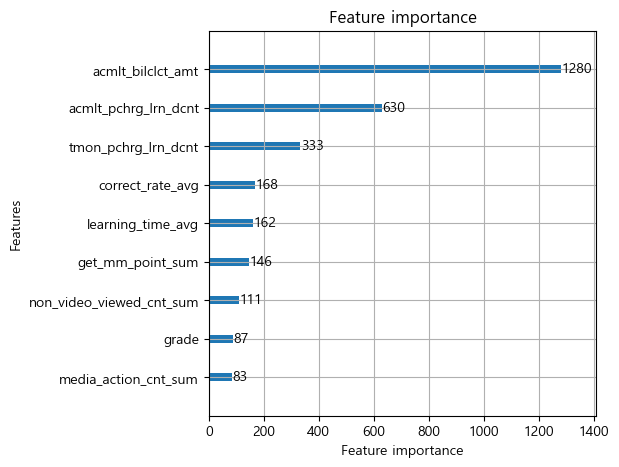

In [70]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(lgbm_model, ax=ax)

# 실습 : 학년 별로 이탈 예측 모델을 구성해본 뒤, 성능 결과를 확인해 보자

### for문 이용하는 법 - ver1 (강사님)

In [1]:
# 데이터 읽어오기
import pandas as pd
churn = pd.read_csv('churn_data.csv', index_col = 0).reset_index()

In [2]:
import copy
churn_df = copy.deepcopy(churn)

In [3]:
# 학년 치환 (숫자로)
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_df['grade'] = churn['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_df.head()

,number,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,3,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,7,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,8,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
3,21,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1
4,25,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1


In [4]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt

In [9]:
from sklearn.metrics import precision_recall_fscore_support

In [12]:
# 모델 구성
def churn_model(grade_df, grade_name = '1'):
    
    X = grade_df[['tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             'get_mm_point_sum']]
    
    y = grade_df['label']
    
    #Train, Test 데이터 분리 (이탈, 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {} 학년, 이탈: {}, 미이탈: {}".format(grade_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {} 학년, 이탈: {}, 미이탈: {}".format(grade_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))
    
    # 모델학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    
    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {}학년, 이탈: {}, 미이탈 {}".format(grade_name ,y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{} 학년, acc: {}, precision: {}, f1: {}".format(grade_name, acc, pre, re, f1))
    
    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{}학년 Feature Importance".format(grade_name))
    plt.show()
    return

# ! pip install koreanize-matplotlib -> 한글폰트 안나올때

In [14]:
# 한글폰트 안나올때 설치
! pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.9/7.9 MB 63.5 MB/s eta 0:00:00


In [16]:
import koreanize_matplotlib

[Train] 1 학년, 이탈: 139, 미이탈: 7861
[Test] 1 학년, 이탈: 35, 미이탈: 1965
[Predict] 1학년, 이탈: 28, 미이탈 1972
1 학년, acc: 0.9935, precision: 0.8928571428571429, f1: 0.7142857142857143


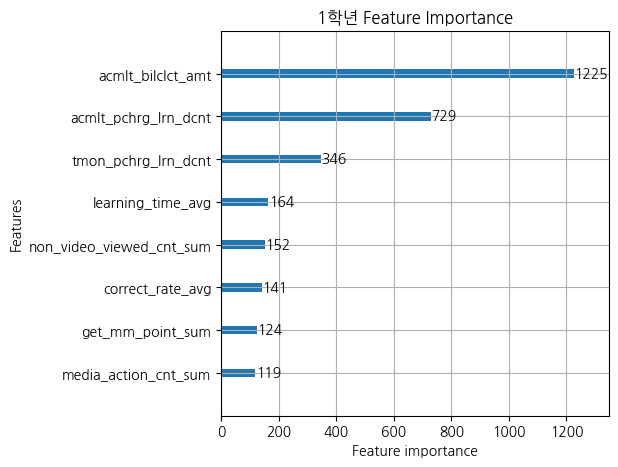

[Train] 2 학년, 이탈: 98, 미이탈: 7902
[Test] 2 학년, 이탈: 22, 미이탈: 1978
[Predict] 2학년, 이탈: 15, 미이탈 1985
2 학년, acc: 0.9935, precision: 0.8, f1: 0.5454545454545454


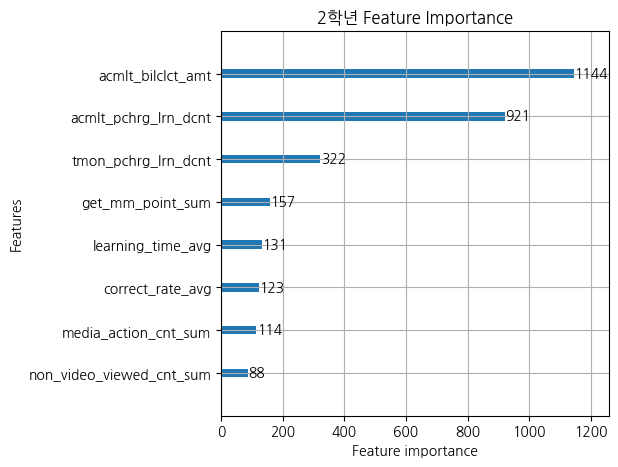

[Train] 3 학년, 이탈: 86, 미이탈: 7914
[Test] 3 학년, 이탈: 21, 미이탈: 1979
[Predict] 3학년, 이탈: 20, 미이탈 1980
3 학년, acc: 0.9935, precision: 0.7, f1: 0.6666666666666666


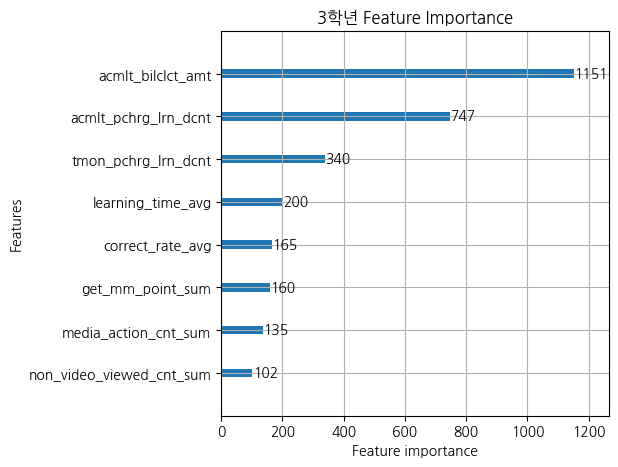

[Train] 4 학년, 이탈: 120, 미이탈: 7880
[Test] 4 학년, 이탈: 32, 미이탈: 1968
[Predict] 4학년, 이탈: 32, 미이탈 1968
4 학년, acc: 0.991, precision: 0.71875, f1: 0.71875


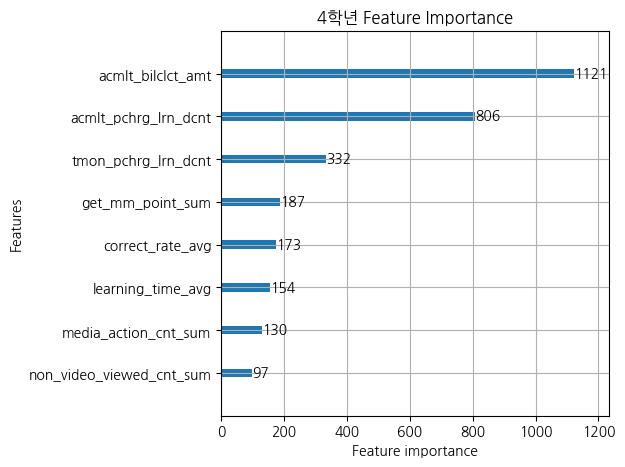

[Train] 5 학년, 이탈: 126, 미이탈: 7874
[Test] 5 학년, 이탈: 32, 미이탈: 1968
[Predict] 5학년, 이탈: 21, 미이탈 1979
5 학년, acc: 0.9895, precision: 0.7619047619047619, f1: 0.5


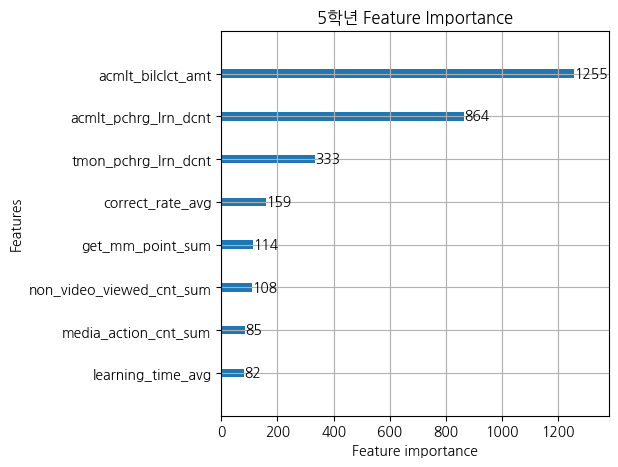

[Train] 6 학년, 이탈: 169, 미이탈: 7831
[Test] 6 학년, 이탈: 52, 미이탈: 1948
[Predict] 6학년, 이탈: 45, 미이탈 1955
6 학년, acc: 0.9845, precision: 0.7333333333333333, f1: 0.6346153846153846


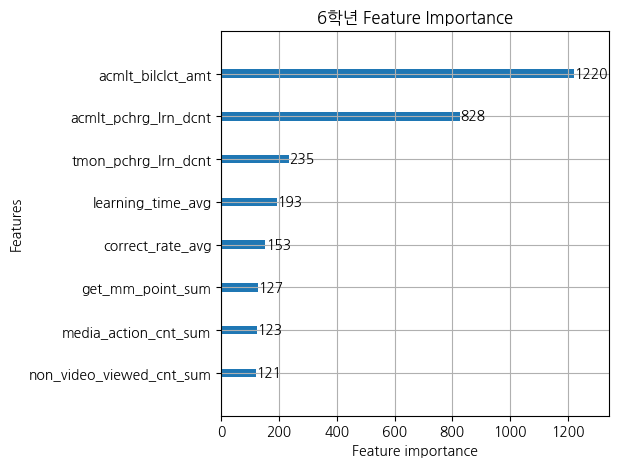

In [17]:
# 실행부 구성
for grade in range(1, 7):
    grade_df = churn_df[churn_df['grade'] == grade]
    churn_model(grade_df, grade_name = str(grade))

---

### 학년별 데이터프레임만 함수로 제작 -ver2 (본인 제작)

### 1학년

In [27]:
churn = pd.read_csv('churn_data.csv', index_col = 0).reset_index()

In [28]:
import copy
churn_df = copy.deepcopy(churn)

In [30]:
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성 (강사님 버전)
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_df['grade'] = churn['grade_sect_cd'].apply(lambda x: grade_dict[x])
churn_df.head()

,number,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,3,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,7,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,8,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
3,21,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1
4,25,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1


In [31]:
# 모델 구성
def grade(num, data):
    if num == 1:
        data = data[churn_df['grade']==1]
        return data
    elif num == 2:
        data = data[data['grade']==2]
        return data
    elif num == 3:
        data = data[data['grade']==3]
        return data
    elif num == 4:
        data = data[data['grade']==4]
        return data
    elif num == 5:
        data = data[data['grade']==5]
        return data
    elif num == 6:
        data = data[data['grade']==6]
        return data

In [32]:
# 학년 치환 전처리, 1학년 데이터만 가져오기
df1 = grade(1, churn_df)

In [33]:
df1['grade'].value_counts()

1    10000
Name: grade, dtype: int64

In [34]:
# 필요 컬럼만 가져오기
X = df1[['tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             'get_mm_point_sum']]

y = df1['label']

In [35]:
# 데이터 분할하기
# Train, Test 데이터 분리 (이탈 미이탈 값 확인)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.3 이렇게가 국룰인데 데이터 양이 적어서 0.2 비율로 설정

print("[Train] 전체 : {}, 이탈: {}, 미이탈: {}".format(len(X_train), y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
print("[Test] 전체 : {}, 이탈: {}, 미이탈: {}".format(len(X_test), y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

[Train] 전체 : 8000, 이탈: 139, 미이탈: 7861
[Test] 전체 : 2000, 이탈: 35, 미이탈: 1965


In [36]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [37]:
# 예측
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print("[Predict] 이탈: {}, 미이탈 {}".format(y_pred.count(1), y_pred.count(0)))
# y_test: 결과 값(실제 값)

[Predict] 이탈: 28, 미이탈 1972


In [38]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9935

In [39]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8928571428571429, 0.7142857142857143, 0.7936507936507937, None)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

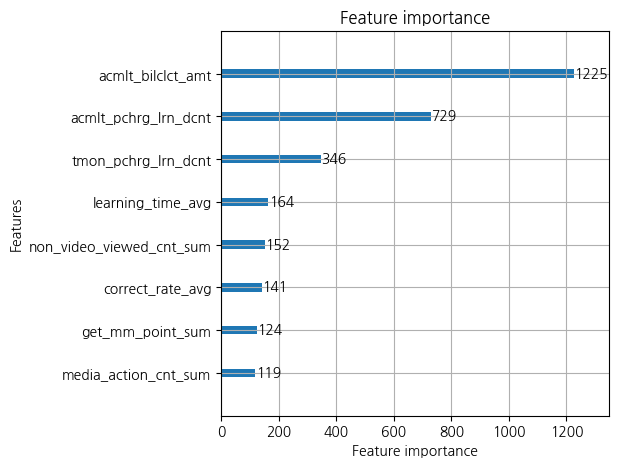

In [40]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(lgbm_model, ax=ax)

---

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# [[ TN, FP
#    FN, TP]]

array([[1962,    3],
       [  10,   25]], dtype=int64)

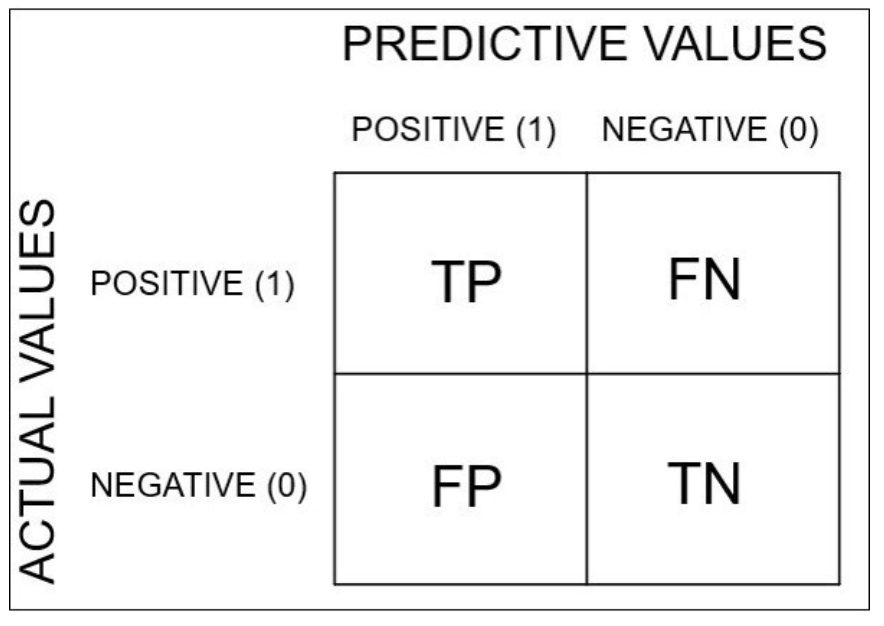

In [44]:
# Confusion Matrix 양식
from IPython.display import Image
Image('./confusion_matrix.png')

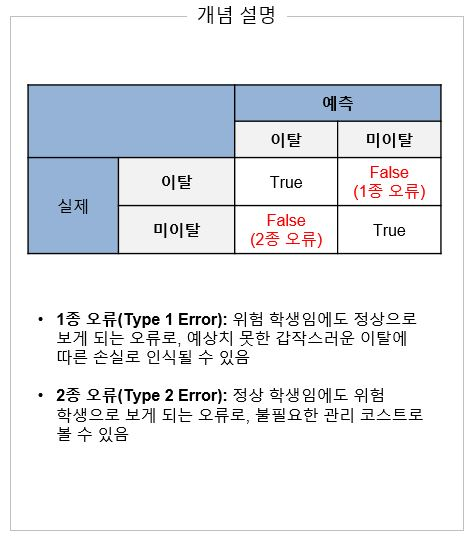

In [45]:
from IPython.display import Image
Image('./error_type.jpg')

In [56]:
# cmtx 구성
# [[ TP, FN
#    FP, TN]]
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=[1,0]),
    index = ['실제: 이탈(1)', '실제: 미이탈(0)'],
    columns = ['예측: 이탈(1)', '예측: 미이탈(0)']
)

cmtx

,예측: 이탈(1),예측: 미이탈(0)
실제: 이탈(1),25,10
실제: 미이탈(0),3,1962


<Axes: title={'center': 'Confusion Matrix'}>

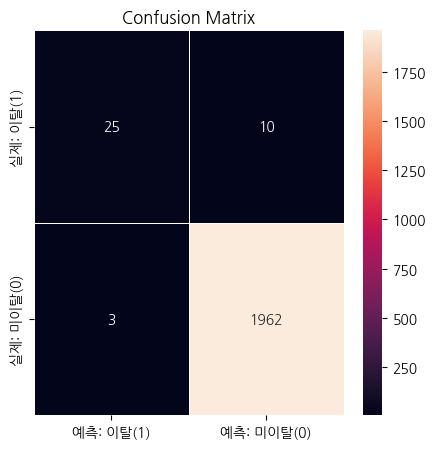

In [57]:
# cmtx 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 한글 폰트 안 깨지고 사용 가능
# pip install koreanize-matplotlib

plt.figure(figsize = (5,5))
plt.title('Confusion Matrix')
sns.heatmap(cmtx, annot=True, fmt=".0f", linewidth=.5)

In [71]:
# Precision
# TP / (TP+FP)
pre = cmtx.iloc[0,0]/(cmtx.iloc[0,0] + cmtx.iloc[1,0])
print(round(pre, 2))
# Recall
# TP /(TP+FN)
recall = cmtx.iloc[0,0]/(cmtx.iloc[0,0] + cmtx.iloc[0,1])
print(round(recall, 2))
# F1 Score
# 2 * (Prescion * Recall)/(Presicion + Recall)
f1 = 2*(pre*recall)/(pre+recall)
print(round(f1, 2))

0.89
0.71
0.79
